<a href="https://colab.research.google.com/github/lukaszek358/Data-Science-Bootcamp/blob/main/5_Uczenie%20Maszynowe%3A%20Scikit-learn/2_Data_Science_Bootcamp_w_j%C4%99zyku_Python_od_A_do_Z_Uczenie_maszynowe_scikit_learn_Metryki_i_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn
>Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  
>
>Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)
>
>Podstawowa biblioteka do uczenia maszynowego w języku Python.
>
>Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
pip install scikit-learn
```

# Import bibliotek


In [34]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Metryki - Klasyfikacja binarna

##Accuracy - dokładność klasyfikacji

$$Accuracy = \frac{correct\ predictions}{total\ predictions} * 100$$

In [35]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print('Dokładność:', accuracy_score(y_true, y_pred))
print('Dokładność z normalizacją:', accuracy_score(y_true, y_pred, normalize= False))

Dokładność: 0.8
Dokładność z normalizacją: 24


Tworzymy z naszego obiektu ramkę danych do porównania

In [38]:
results = pd.DataFrame({'y_true': y_true,
                        'y_pred': y_pred})

results

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


Sortujemy nasz zbiór danych po kolumnie 'y_true'

In [39]:
results = results.sort_values(by='y_true')
results = results.reset_index(drop=True)

#dodawanie kolumny z numerem próbki 
results['sample'] = results.index + 1
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,1,9
9,0,1,10


Tworzenie wykresu

In [42]:
fig = make_subplots(rows= 2, cols= 1)

# add_trace - dodajemy ślad naszego wykresu
fig.add_trace(go.Scatter(x = results['sample'], y = results['y_true'], mode = 'markers', name = 'y_true'), row= 1, col= 1)
fig.add_trace(go.Scatter(x = results['sample'], y = results['y_pred'], mode = 'markers', name = 'y_pred'), row= 2, col= 1)

fig.update_layout(width = 900, height = 500, title = 'Klasyfikator binarny')

fig.show()

## Macierz konfuzji/pomyłek


Import biblioteki

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt


In [63]:
cm = confusion_matrix(y_true, y_pred)

Macierz konfuzji

In [66]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=600, height=600, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

Macierz konfuzji (własnej roboty)

<Axes: >

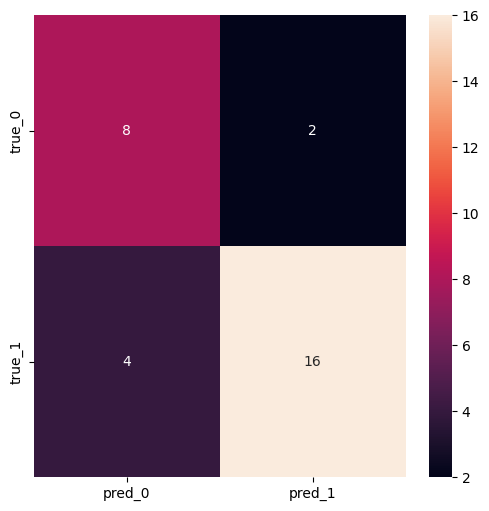

In [67]:
#moja własna macierz
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, xticklabels=('pred_0', 'pred_1'), yticklabels=('true_0', 'true_1'))

In [71]:
#rozwijanie (spłaszczenie) naszej macierzy do postaci tablicy (listy)

#prawdziwie przewidziane | fałszywa pozytywna | fałszywa negatywna | prawdziwie poztywna
tn, fp, fn, tp =  cm.ravel()

In [72]:
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')

TN - True Negative: 8
FP - False Positive: 2
FN - False Negative: 4
TP - True Positive: 16


### Błąd I rodzaju (Type I Error / False Positive Rate)

In [74]:
fpr = fp / (fp + tn)
fpr

0.2